# mrbles pipeline example

## Load necessary modules

In [1]:
import os
import gc
import importlib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import mrbles

# For fancy interactive Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools
from plotly.tools import FigureFactory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # For plotly offline mode
# Set plotly to notebook mode
init_notebook_mode(connected=True)
py.sign_in('bjornharink_stanford', 'VqISgcHFwPkY0z50PG47')

Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


In [89]:
importlib.reload(mrbles)
importlib.reload(mrbles.data)
importlib.reload(mrbles.core)
importlib.reload(mrbles.pipeline)
importlib.reload(mrbles)

Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford
Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


<module 'mrbles' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\__init__.py'>

## Load image set

The dictionary keys of image folders and image pattersn must match.
The instatiatiation of the object will search for the files. An error is thrown if no images are found.

In [3]:
# image_folder = r"C:\DATA\Huy"
# image_folders = {"50 nM" : r"C:\DATA\Huy", 
#                  "100 nM" : r"C:\DATA\Huy",
#                  "250 nM" : "C:\DATA\Huy",
#                  "500 nM" : r"C:\DATA\Huy",
#                  "1000 nM" : r"C:\DATA\Huy"
# }
# image_patterns = {"50 nM" : r"20170726_HQN_CN_PxI2_1Step_50nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "100 nM" : r"20170726_HQN_CN_PxI2_1Step_100nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20170726_HQN_CN_PxI2_1Step_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20170726_HQN_CN_PxI2_1Step_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20170726_HQN_CN_PxI2_1Step_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [4]:
# image_folders = {"63 nM" : r"C:\DATA\Huy\20180111 CN", 
#                  "125 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "250 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "500 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "1000 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "2000 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "Biotin" : r"C:\DATA\Huy\20180111 CN"
#                  #"NIR" : r"C:\DATA\Huy\20180111 CN"
# }
# image_patterns = {"63 nM" : r"20180111_CN_Final_Normal_p49_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "125 nM" : r"20180111_CN_Final_Normal_p49_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20180111_CN_Final_Normal_p49_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20180111_CN_Final_Normal_p49_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20180111_CN_Final_Normal_p49_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "2000 nM" : r"20180111_CN_Final_Normal_p49_2uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
#                   #"NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [90]:
image_folders = {"32 nM" : r"C:\DATA\Huy\20180112 CN",
                 "63 nM" : r"C:\DATA\Huy\20180112 CN", 
                 "125 nM" : r"C:\DATA\Huy\20180112 CN",
                 "250 nM" : r"C:\DATA\Huy\20180112 CN",
                 "500 nM" : r"C:\DATA\Huy\20180112 CN",
                 "1000 nM" : r"C:\DATA\Huy\20180112 CN",
                 "2000 nM" : r"C:\DATA\Huy\20180112 CN",
                 "Biotin" : r"C:\DATA\Huy\20180111 CN"
                 #"NIR" : r"C:\DATA\Huy\20180111 CN"
}
image_patterns = {"32 nM" : r"20180111_CN_Final_Super_32nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "63 nM" : r"20180111_CN_Final_Super_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
                  "125 nM" : r"20180111_CN_Final_Super_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "250 nM" : "20180111_CN_Final_Super_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "500 nM" : r"20180111_CN_Final_Super_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "1000 nM" : r"20180111_CN_Final_Super_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "2000 nM" : r"20180111_CN_Final_Super_2uMd_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
                  #"NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(90, 990)
mrbles_images.crop_y = slice(90, 990)

If no error was thrown the images can be loaded into memory.

In [91]:
mrbles_images.load()
mrbles_images.rename_channel('Cy5-E 10%', 'Cy5-E')

In [7]:
mrbles_images

{'32 nM': <xarray.DataArray (f: 35, c: 11, y: 900, x: 900)>
array([[[[463, ..., 638],
         ...,
         [541, ..., 861]],

        ...,

        [[108, ..., 108],
         ...,
         [119, ..., 119]]],


       ...,


       [[[468, ..., 569],
         ...,
         [586, ..., 879]],

        ...,

        [[ 97, ..., 102],
         ...,
         [109, ...,  97]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5-E' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-546' ...
Dimensions without coordinates: f, y, x, '63 nM': <xarray.DataArray (f: 23, c: 11, y: 900, x: 900)>
array([[[[443, ..., 738],
         ...,
         [604, ..., 923]],

        ...,

        [[121, ..., 106],
         ...,
         [ 95, ..., 127]]],


       ...,


       [[[523, ..., 676],
         ...,
         [579, ..., 868]],

        ...,

        [[116, ..., 115],
         ...,
         [111, ..., 113]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5-E' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-5

By calling the object the Xarray content is displayed.

The internal Xarray DataArray can be sliced using Xarray syntax (similar to Pandas).
```python
mrbles_images['set name', file number, 'channel name', y-slice, x-slice]
```

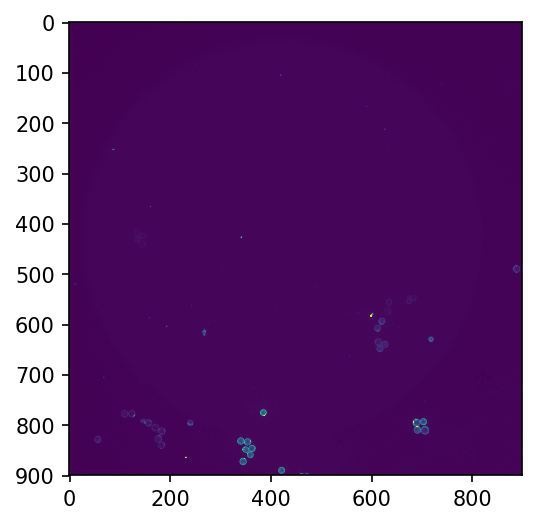

In [8]:
plt.figure(dpi=150)
plt.imshow(mrbles_images['2000 nM', 0, 'Cy5-E']);

## Find MRBLEs in images

Instatiate a MBRLEs finding object, giving initial bead_size (pixels), which must be set. More fine-tune settings can be set by calling object.settings.area_max etc. Otherwise, default settings are used.

In [9]:
find_mrbles = mrbles.Find(bead_size=14, border_clear=True, circle_size=350)
find_mrbles.settings.eccen_max = 0.65
find_mrbles.settings.parallelize = True

In [10]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Mean bead radius: 14.23
Number of beads in set 32 nM: 1027
Number of beads in set 63 nM: 989
Number of beads in set 125 nM: 875
Number of beads in set 250 nM: 1162
Number of beads in set 500 nM: 876
Number of beads in set 1000 nM: 1058
Number of beads in set 2000 nM: 1351
Number of beads in set Biotin: 3223
Total number of beads: 10561


## Create Reference spectra

In [11]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\DATA\20170406 - Reference files - KARA",
    "Sm": r"C:\DATA\20170406 - Reference files - KARA",
    "Tm": r"C:\DATA\20170406 - Reference files - KARA",
    "Eu": r"C:\DATA\20170406 - Reference files - KARA",
    "bkg": r"C:\DATA\Huy\20180111 CN\20180111_CN_Final_Normal_biotinb_5"
}
REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "20180111_CN_Final_Normal_biotinb_5_MMStack_Pos0.ome.tif"
}

In [12]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=18)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
spec_object.bkg_roi = [slice(390, 738), slice(377, 733)]

In [13]:
spec_object.load()

Mean bead radius: 15.65
Number of beads in set Dy: 270
Number of beads in set Sm: 506
Number of beads in set Tm: 308
Number of beads in set Eu: 203
Total number of beads: 1287


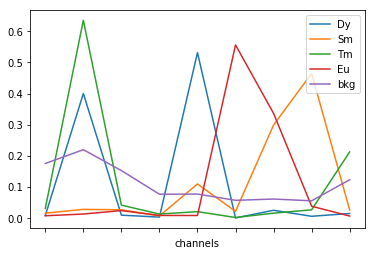

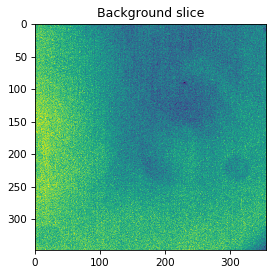

In [14]:
spec_object.plot()

## Spectral unmixing and get ratios

In [15]:
ratio_images = mrbles.Ratio(spec_object)

In [16]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu')

In [17]:
ratio_images

{'32 nM': <xarray.DataArray (f: 35, c: 8, y: 900, x: 900)>
array([[[[32.758897, ..., 19.493782],
         ...,
         [65.154322, ..., 36.140583]],

        ...,

        [[-1.663682, ..., -1.029684],
         ...,
         [-0.951808, ...,  3.961032]]],


       ...,


       [[[84.014807, ..., 53.722382],
         ...,
         [69.38333 , ..., 39.315484]],

        ...,

        [[-1.567522, ..., -1.381648],
         ...,
         [-1.070265, ..., -1.628577]]]])
Coordinates:
  * c        (c) object 'Dy' 'Sm' 'Tm' 'Eu' 'bkg' 'Dy_ratio' 'Sm_ratio' ...
Dimensions without coordinates: f, y, x, '63 nM': <xarray.DataArray (f: 23, c: 8, y: 900, x: 900)>
array([[[[46.906136, ..., 22.401946],
         ...,
         [41.589483, ..., 28.103354]],

        ...,

        [[-0.870189, ..., -0.937336],
         ...,
         [-1.281832, ..., -1.642737]]],


       ...,


       [[[69.715033, ..., 71.133919],
         ...,
         [55.212118, ..., 46.782622]],

        ...,

        [[-1.19183 ,

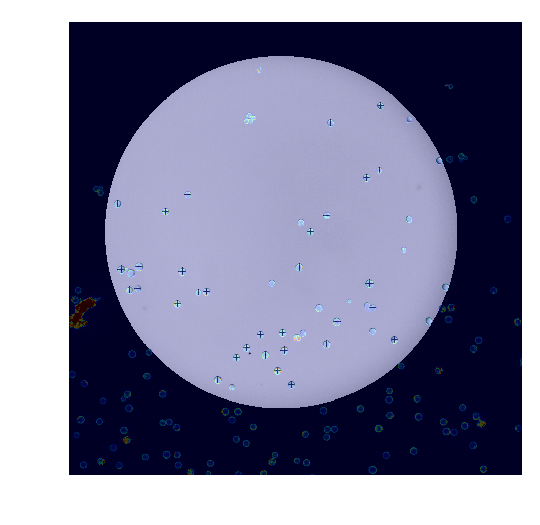

In [18]:
plt.figure(dpi=150)
find_mrbles.settings.show_image_overlay(find_mrbles['Biotin', 20, 'mask_check'], mrbles_images['Biotin', 20, 'Cy5-E'])

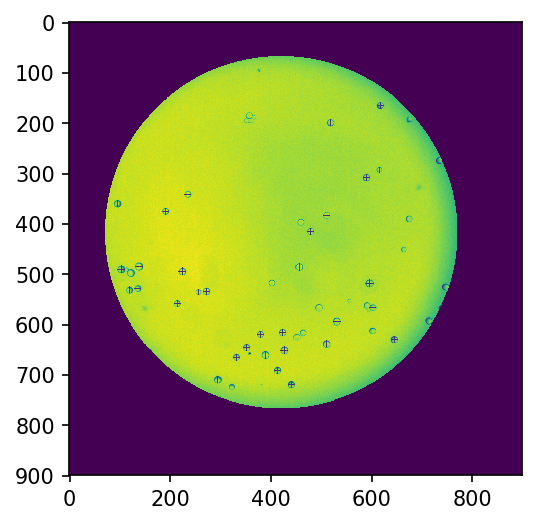

In [19]:
plt.figure(dpi=150)
plt.imshow(find_mrbles['Biotin', 20, 'mask_check'])

## Extract data from each MRBLE

In [59]:
extract_data = mrbles.Extract()

In [60]:
extract_data.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])

In [61]:
extract_data.filter(bkg_factor=2.0, ref_factor=2.0, bkg='bkg.mask_full', ref='Eu.mask_inside')

Pre-filter: 10561
Post-filter: 10073
Filtered: 488 (4.6%)


In [62]:
ratio_data = extract_data._dataframe

In [63]:
extract_data.get(mrbles_images[:, :, ['Cy5-E']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])

In [64]:
assay_data = extract_data._dataframe

In [65]:
index = ratio_data.index
new_set = pd.concat([ratio_data.reset_index(drop=True), assay_data.drop('flag', axis=1).reset_index(drop=True)], axis=1)
new_set.index = index

In [66]:
new_set

Dy_ratio.mask_bkg  Dy_ratio.mask_full  Dy_ratio.mask_inside  \
32 nM  0  0            0.099211            0.135177              0.135202   
          1           -0.033156            0.137804              0.139993   
          2            0.015379            0.002269              0.002167   
          3            0.032695            0.144003              0.143995   
          4            0.027118            0.144084              0.146909   
          5            0.684508            0.813354              0.813354   
          6            0.077070            0.112829              0.113768   
          7            0.484770            0.479215              0.482380   
          8            0.579622            0.482768              0.484241   
          9            0.027714            0.005000              0.004854   
          10           0.159686            0.142716              0.143710   
          11           0.618677            0.508037              0.510030   
          12           0.781271            0.501556              0.503982   
       1  0           -0.121229            0.005130              0.005468   
          1            0.121824            0.006359              0.006054   
          2            0.297725            0.296824              0.300280   
          3            0.092712            0.141712              0.143090   
          4           -0.002617            0.008412              0.008339   
          5            0.187162            0.120940              0.120721   
          6            0.415713            0.145617              0.146128   
       2  0           -0.042572            0.004515              0.004882   
          1            0.171226            0.245556              0.246249   
          2            0.131048            0.248698              0.252981   
          3            0.041322            0.008358              0.008689   
          4            0.120026            0.264346              0.269926   
          5            0.063054            0.008870              0.008601   
          6            0.027526            0.007358              0.007428   
          7            0.007668            0.006128              0.006080   
          8            0.062904            0.009140              0.008455   
          9            0.026024            0.006922              0.006448   
...                         ...                 ...                   ...   
Biotin 28 1            0.271781            0.474708              0.476921   
          2            0.140292            0.101018              0.101592   
          3            0.160831            0.150273              0.150396   
          4            0.177488            0.149771              0.152972   
          5           -0.020806            0.013123              0.013851   
          6            0.162062            0.149558              0.151239   
          7            0.215707            0.122785              0.121722   
          8            0.152896            0.153185              0.152534   
          9            0.163027            0.150788              0.150788   
          10           0.186491            0.158169              0.157000   
          11           0.116436            0.154310              0.155899   
          12           0.150833            0.153269              0.154283   
          13           0.173603            0.152237              0.153765   
          14           0.152692            0.156329              0.156563   
          15           0.317732            0.480536              0.480703   
          16           0.208572            0.155095              0.156072   
          17           0.162366            0.166917              0.165770   
          18           0.284341            0.008376              0.007814   
          19           0.040844            0.000331              0.000464   
          20           0.160978            0.159050              0.159101   
          

## Decode

In [67]:
# Target file location
# TARGET_FOLDER = r"C:\DATA\CodeSets"
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_48Codes.csv")
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_96Codes.csv")
#target_load = np.genfromtxt(TARGET_FILE, delimiter=',')
# target = target_load[:, 1:4]  # Target set to Dy, Sm, Tm (no CeTb) Order: [CeTb, Dy, Sm, Tm]

seq_file = pd.read_excel(r'C:\DATA\Huy\20180105_SEQ_CN_Final-Match-List.xlsx')
seq_file.loc[(seq_file.code==12), ('Dy', 'Sm', 'Tm')] = [0, 0.41682, 0.02844]
seq_file.loc[(seq_file.code==13), ('Dy', 'Sm', 'Tm')] = [0, 0.47785, 0.04081]
#target = seq_file.loc[(seq_file.set=='match'), ['Dy', 'Sm', 'Tm']].values
target = seq_file.loc[:, ['Dy', 'Sm', 'Tm']].values
target_biotin = seq_file.loc[:, ['Dy', 'Sm', 'Tm']].values
#sequences = seq_file.loc[(seq_file.set=='match')].reset_index(drop=True)
sequences = seq_file.reset_index(drop=True)
sequences_biotin = seq_file.reset_index(drop=True)

In [ ]:
seq_file

In [68]:
biotin_set = new_set.loc[('Biotin', slice(None), new_set.flag == False)]

In [69]:
biotin_set

Dy_ratio.mask_bkg  Dy_ratio.mask_full  Dy_ratio.mask_inside  \
Biotin 0  0            0.063617            0.090448              0.090750   
          1            0.088981            0.144796              0.145960   
          2            0.061325            0.007637              0.007291   
          3            0.023510            0.008405              0.008375   
          4            0.405017            0.488265              0.484728   
          5            0.267838            0.123762              0.123661   
          6            0.041760            0.008120              0.007122   
          7            0.276695            0.238352              0.240700   
          8            0.207665            0.122702              0.122702   
          9            0.009956            0.126458              0.128828   
          10           0.188961            0.151511              0.152244   
          11           0.182385            0.003319              0.002613   
          14           0.231508            0.142152              0.139898   
          15           0.430765            0.496965              0.498752   
          16           0.025922            0.006026              0.006542   
          17           0.234452            0.118236              0.117311   
          18           0.335632            0.145415              0.144817   
          19           0.205136            0.105620              0.107936   
          20           0.231775            0.136048              0.136441   
          21           0.057955            0.011286              0.010724   
          22           0.162602            0.005456              0.004903   
          23           0.274689            0.145886              0.146812   
          24           0.134286            0.140708              0.141618   
          25           0.152670            0.121244              0.120378   
          26           0.326760            0.101126              0.100396   
          27           0.311532            0.293495              0.293378   
          28           0.332295            0.123796              0.120660   
          29           0.176024            0.009381              0.009220   
          31           0.306875            0.103188              0.104595   
       1  0            0.175241            0.141562              0.140605   
...                         ...                 ...                   ...   
       28 0            0.137335            0.130592              0.131486   
          1            0.271781            0.474708              0.476921   
          2            0.140292            0.101018              0.101592   
          3            0.160831            0.150273              0.150396   
          4            0.177488            0.149771              0.152972   
          5           -0.020806            0.013123              0.013851   
          6            0.162062            0.149558              0.151239   
          7            0.215707            0.122785              0.121722   
          8            0.152896            0.153185              0.152534   
          9            0.163027            0.150788              0.150788   
          10           0.186491            0.158169              0.157000   
          11           0.116436            0.154310              0.155899   
          12           0.150833            0.153269              0.154283   
          13           0.173603            0.152237              0.153765   
          14           0.152692            0.156329              0.156563   
          15           0.317732            0.480536              0.480703   
          16           0.208572            0.155095              0.156072   
          17           0.162366            0.166917              0.165770   
          18           0.284341            0.008376              0.007814   
          20           0.160978            0.159050              0.159101   
          

In [70]:
mrbles_decode_biotin = mrbles.Decode(target_biotin)

In [71]:
mrbles_decode_biotin.decode(biotin_set.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine=biotin_set)

Delta:  0.12356326991415723
Delta:  0.049789483620428225
Delta:  0.06951031402800094
Delta:  0.06467380435983448
Delta:  0.03608193046628739
Delta:  0.007843266915780769
Delta:  0.0003378612655815647
Delta:  0.0
Converged after: 8
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.7400501672321559
AIC: 255488.6816741301
BIC: 258376.93600542124


In [74]:
extract_set_biotin = mrbles_decode_biotin.data.loc[(mrbles_decode_biotin.data.confidence > 0.95), ('code', 'flag', 'Cy5-E.mask_ring')]
extract_set_biotin.loc[:, 'Cy5-E.mask_ring'] -= mrbles_decode_biotin.data.loc[:, ('Cy5-E.mask_bkg')]

In [75]:
mrbles_biotin = mrbles.Analyze(seq_list=sequences_biotin)

In [76]:
mrbles_biotin.extract(extract_set_biotin)

In [77]:
mrbles_biotin.data

mean    median            sd           se    N        CV  \
set    code                                                                     
Biotin 0     19337.281250  18619.25   3881.472369   489.019553   64  0.200725   
       1     18457.402597  17839.50   3346.135490   383.828064   77  0.181290   
       2     17878.970930  17313.00   3536.195179   383.554220   86  0.197785   
       3     24444.919355  23085.00   5011.820189   522.518375   93  0.205025   
       4     16408.439394  16389.50   3015.209864   304.582192   99  0.183760   
       5     18691.235714  19008.00   2642.011371   318.060793   70  0.141350   
       6     18002.700000  17643.00   5353.990898   622.388800   75  0.297399   
       7     16299.407895  15968.50   3279.669188   378.703578   76  0.201214   
       8     16600.887097  16345.75   3250.327658   416.161812   62  0.195792   
       9     16913.056818  16775.75   2949.610362   316.231424   88  0.174398   
       10    17442.973958  17481.75   2989.676382   306.734325   96  0.171397   
       11    15057.946429  15521.50   2739.925346   527.298879   28  0.181959   
       12    19323.500000  17100.75   6471.551561   906.198476   52  0.334906   
       13    19940.531250  20350.00   4208.255048   530.190300   64  0.211040   
       14    18227.020833  18155.75   2762.725216   327.875161   72  0.151573   
       15    17090.669355  17551.50   3881.630370   496.991842   62  0.227120   
       16    15444.122449  14783.00   3553.271575   512.870575   49  0.230073   
       17    14996.136364  15468.25   2187.576093   477.368240   22  0.145876   
       18    15792.475410  15832.00   2337.878794   301.818855   61  0.148038   
       19    17921.854369  17045.00   4941.498125   489.281223  103  0.275725   
       20    13437.030303  12723.50   2608.723652   461.161546   33  0.194144   
       21    16168.893750  16274.75   3244.316378   365.014110   80  0.200652   
       22    16948.223077  17099.00   2434.157319   304.269665   65  0.143623   
       23    14603.980769  14511.25   2104.816174   420.963235   26  0.144126   
       24    17145.777778  17320.50   2947.621181   404.886908   54  0.171915   
       25    16554.864583  15758.25   3818.913639   557.045805   48  0.230682   
       26    17130.583333  16670.25   2994.976098   506.243358   36  0.174832   
       27    16903.336364  16045.00   5824.957252   792.676280   55  0.344604   
       28    16599.371429  16073.50   3165.891153   542.945853   35  0.190724   
       29    17338.655556  17052.50   3120.666932   330.790033   90  0.179983   
       30    20419.301587  20534.50   3692.047949   468.890558   63  0.180812   
       31    18041.912844  18134.50   4349.980666   418.577085  109  0.241104   
       32    17828.491071  17621.50   3581.713760   339.961225  112  0.200898   
       33    18088.183333  18191.75   2734.526685   507.788858   30  0.151178   
       34    18923.058824  17420.50   6207.251402  1551.812850   17  0.328026   
       35    16379.895833  16337.50   2783.334470   405.991059   48  0.169924   
       36    19070.427778  18841.25   3012.316876   319.304950   90  0.157957   
       37    20952.442623  20396.00   4645.086848   599.678134   61  0.221697   
       38    34276.295455  30162.50  14277.889571  2177.357747   44  0.416553   
       39    19604.365385  19225.50   3998.483619   455.669498   78  0.203959   
       40    21090.888889  20458.50   3808.087277   523.081016   54  0.180556   
       41    19586.212766  19057.00   4229.176490   623.558055   47  0.215926   
       42    19081.880000  18869.50   2834.365057   404.909294   50  0.148537   
       43    15761.804348  15212.50   3168.994900   472.405868   46  0.201055   
       44    22054.026786  20706.25   5192.613369   700.171844   56  0.235450   
       45    18441.500000  18341.50   4685.684392   855.485013   31  0.254084   
       46    17245.166667  12165.00   7344.114087  5193.072873    3  0.425865   
       47    22445.212121  21470.00   5428.962769   

# Concentrations

In [86]:
mrbles_decode = mrbles.Decode(target)

In [87]:
bead_set = new_set.loc[(['32 nM', '63 nM', '125 nM','250 nM','500 nM', '1000 nM','2000 nM'])]

In [88]:
mrbles_decode.decode(bead_set.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine=bead_set)

Delta:  1.81989646934829
Delta:  0.18767210949969163
Delta:  0.10008555769541617
Delta:  0.10165421142581689
Delta:  0.08112277806413475
Delta:  0.1329198702967339
Delta:  0.2310186582478141
Delta:  0.10781921327365747
Delta:  0.08569217866148128
Delta:  0.009176324851215775
Delta:  0.00033263485302142395
Delta:  0.0
Converged after: 12
Number of unique codes found: 8
Missing codes: [ 0  1  2  4  5  6  8  9 10 11 12 13 14 15 16 17 18 20 21 23 24 26 27 28
 30 31 32 33 34 35 36 39 40 41 42 43 44 45 46 47]
Silhouette Coefficient: 0.2096938821657827
AIC: 3455141759.62029
BIC: 3455145065.1138387


In [ ]:
mrbles_final = mrbles.Analyze(seq_list=sequences)

In [ ]:
extract_set = mrbles_decode.data.loc[(mrbles_decode.data.confidence > 0.95), ('code', 'flag', 'Cy5.mask_ring')]
extract_set.loc[:, 'Cy5.mask_ring'] -= mrbles_decode.data.loc[:, ('Cy5.mask_bkg')]

In [ ]:
mrbles_final.extract(extract_set)

In [ ]:
mrbles_final.data.loc['2000 nM']

In [ ]:
norm_data = mrbles_biotin.data
norm_max = norm_data['mean'].max()

In [ ]:
norm_data['mean_scaled'] = mrbles_biotin.data['mean'] / norm_data['mean'].max()
norm_data['median_scaled'] = mrbles_biotin.data['median'] / norm_data['median'].max()
norm_data['sd_scaled'] = mrbles_biotin.data['sd'] / norm_data['mean'].max()
norm_data['se_scaled'] = mrbles_biotin.data['sd_scaled'] / np.sqrt(norm_data['N'])

In [ ]:
norm_data

In [ ]:
beads_data = mrbles_final.data

In [ ]:
beads_data

In [ ]:
set_codes = np.unique(beads_data['set.code'])

In [ ]:
for code in set_codes:
    norm_mean = norm_data.loc[norm_data['set.code'] == code, 'mean_scaled'].values
    norm_sd = norm_data.loc[norm_data['set.code'] == code, 'sd_scaled'].values
    
    data_mean = beads_data.loc[beads_data['set.code'] == code, 'mean'].values
    data_median = beads_data.loc[beads_data['set.code'] == code, 'median'].values
    data_sd = beads_data.loc[beads_data['set.code'] == code, 'sd'].values
    data_n = beads_data.loc[beads_data['set.code'] == code, 'N'].values
    
    mean_norm = (data_mean / norm_mean)
    median_norm = (data_median / norm_mean)
    sd_norm = np.abs(mean_norm) * (np.sqrt((data_sd / data_mean) ** 2 + (norm_sd / norm_mean)**2))
    cv_norm = mean_norm / sd_norm
    se_norm = sd_norm / np.sqrt(data_n)
    
    beads_data.loc[beads_data['set.code'] == code, 'mean_norm'] = mean_norm
    beads_data.loc[beads_data['set.code'] == code, 'median_norm'] = median_norm
    beads_data.loc[beads_data['set.code'] == code, 'sd_norm'] = sd_norm
    beads_data.loc[beads_data['set.code'] == code, 'cv_norm'] = cv_norm
    beads_data.loc[beads_data['set.code'] == code, 'se_norm'] = se_norm

In [ ]:
beads_data.loc['2000 nM']

In [ ]:
sequences

In [ ]:
beads_data.to_csv(r'D:\20180120_CN_Final_Calibration.csv')

In [85]:
bead_set1 = mrbles_decode.data

confidence = 0.95

colors = np.multiply(bead_set1[(bead_set1.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set1.loc[(bead_set1.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set1.loc[(bead_set1.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set1.loc[(bead_set1.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set.loc[(bead_set1.confidence > confidence), ('Cy5-E.mask_ring')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target[:,0],
    y=target[:,1],
    z=target[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode.settings.gmm.means[:,0],
    y=mrbles_decode.settings.gmm.means[:,1],
    z=mrbles_decode.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
bead_set = mrbles_decode_biotin.data

confidence = 0.95

colors = np.multiply(bead_set[(bead_set.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target_biotin)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set.loc[(bead_set.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set.loc[(bead_set.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set.loc[(bead_set.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set.loc[(bead_set.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target_biotin[:,0],
    y=target_biotin[:,1],
    z=target_biotin[:,2],
    text=list(range(1, len(target_biotin)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode_biotin.settings.gmm.means[:,0],
    y=mrbles_decode_biotin.settings.gmm.means[:,1],
    z=mrbles_decode_biotin.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)